# Task 2

## Importación de Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Carga del Dataset

In [2]:
dataset = pd.read_csv("dataset_phishing.csv")

print(dataset.info())
print(dataset.head())
print("\n" + "=" * 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## 1. Preprocesamiento de Datos

### 1a. Eliminación de Columnas

In [3]:
columnas_a_eliminar = ['url', 'length_url']

print(f"\nColumnas identificadas para eliminar: {columnas_a_eliminar}")

for columna in columnas_a_eliminar:
    if columna in dataset.columns:
        print(f"  Columna '{columna}' encontrada y sera eliminada")
    else:
        print(f"  Advertencia: Columna '{columna}' no encontrada")

dataset = dataset.drop(columns=columnas_a_eliminar, errors='ignore')

print(f"\nResultado despues de eliminar columnas:")
print(f"Columnas restantes: {dataset.shape[1]}")
print(f"Filas: {dataset.shape[0]}")


Columnas identificadas para eliminar: ['url', 'length_url']
  Columna 'url' encontrada y sera eliminada
  Columna 'length_url' encontrada y sera eliminada

Resultado despues de eliminar columnas:
Columnas restantes: 87
Filas: 11430


### 1b. Codificación de Variables Categóricas

In [4]:
print("\n" + "=" * 30)
print("\nvariables categoricas")

print(dataset["status"].dtype)
print(dataset["status"].value_counts())

print("\nCodificando variables categoricas")

dataset["status"] = (
    dataset["status"]
    .str.strip()
    .str.lower()
    .map({
        "phishing": 1,
        "legitimate": 0
    })
    .astype(int)
)

print(dataset["status"].dtype)
print(dataset["status"].value_counts())



variables categoricas
object
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Codificando variables categoricas
int64
status
0    5715
1    5715
Name: count, dtype: int64


## 2. Selección de Features

### 2a. Separación de Variables Independientes y Objetivo

In [5]:
print("\n" + "=" * 30)
print("\nvariables independientes y objetivo")

# X = variables independientes
# y = variable objetivo
X = dataset.drop(columns=["status"])
y = dataset["status"]



variables independientes y objetivo


### 2b. Análisis de Correlación con Variable Objetivo

In [6]:
print("\n" + "=" * 30)
print("\nCorrelacion con variable objetivo")

# correlacion con var obj, como la pusimos estandar 0 1 puedo usar pearson
correlations = X.corrwith(y)
print(correlations)

# como no importa si es neg o pos solo que tan fuerte esta correlacion
# puedo usar el valor absoluto
correlations = correlations.abs()
print(correlations)

# ordenar por correlacion
correlations = correlations.sort_values(ascending=False)
print(correlations)

# mostrar las 10 mas correlacionadas
print("\nLas 10 mas correlacionadas:")
print(correlations.head(10))



Correlacion con variable objetivo
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
nb_at              0.142915
                     ...   
domain_age        -0.331889
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
Length: 86, dtype: float64
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens         0.100107
nb_at              0.142915
                     ...   
domain_age         0.331889
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank          0.511137
Length: 86, dtype: float64
google_index            0.731171
page_rank               0.511137
nb_www                  0.443468
ratio_digits_url        0.356395
domain_in_title         0.342807
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              N

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### 2c. Selección de las 2 Variables Más Correlacionadas

In [7]:
print("\nSeleccionando las 2 variables mas correlacionadas:")
X_selected = X[correlations.head(2).index]
print(X_selected.head())

selected_features = [correlations.index[2], correlations.index[3]]
#selected_features = ["ratio_digits_url", "nb_dots"]

print(f"\nFeatures seleccionadas: {selected_features}")

# dataset con las 2 variables mas correlacionadas
X_2d = dataset[selected_features]
y = dataset["status"]


Seleccionando las 2 variables mas correlacionadas:
   google_index  page_rank
0             1          4
1             1          2
2             1          0
3             0          3
4             0          6

Features seleccionadas: ['nb_www', 'ratio_digits_url']


### 2d. Visualización de Features Seleccionadas

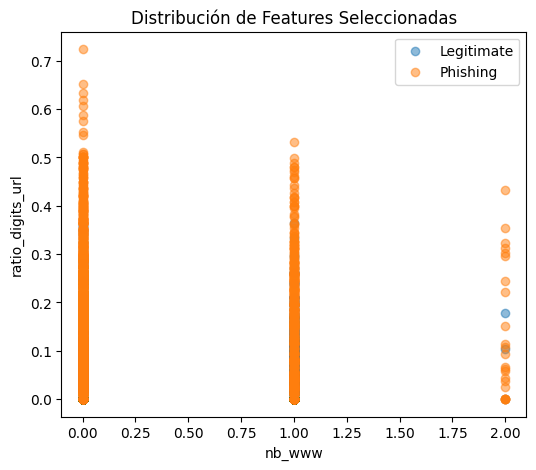

In [8]:
plt.figure(figsize=(6, 5))

plt.scatter(
    X_2d[y == 0].iloc[:, 0],
    X_2d[y == 0].iloc[:, 1],
    label="Legitimate",
    alpha=0.5
)

plt.scatter(
    X_2d[y == 1].iloc[:, 0],
    X_2d[y == 1].iloc[:, 1],
    label="Phishing",
    alpha=0.5
)

plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.title("Distribución de Features Seleccionadas")
plt.show()

## 3. Escalado de Datos

### 3a. StandardScaler

In [9]:
print("\n" + "=" * 30)
print("\n Escalado MUST")

scaler = StandardScaler()

# Ajustar y transformar SOLO las features
X_scaled = scaler.fit_transform(X_2d)

# pasarlo a dataframe pq me daba errores
X_scaled = pd.DataFrame(
    X_scaled,
    columns=X_2d.columns
)

# para verrificar mean ≈ 0, std ≈ 1
print("\nVerificacion de escalado mean ≈ 0, std ≈ 1: ")
print(X_scaled.describe())



 Escalado MUST

Verificacion de escalado mean ≈ 0, std ≈ 1: 
             nb_www  ratio_digits_url
count  1.143000e+04      1.143000e+04
mean  -1.268160e-16     -2.455506e-17
std    1.000044e+00      1.000044e+00
min   -8.935595e-01     -5.946509e-01
25%   -8.935595e-01     -5.946509e-01
50%   -8.935595e-01     -5.946509e-01
75%    1.098907e+00      2.935108e-01
max    3.091374e+00      7.506179e+00


## 4. División del Dataset (80/20)

### 4a. Train/Test Split

In [10]:
print("\n" + "=" * 30)
print("Split 80/20")

# hacer el split 80 / 20
X_train, X_test, y_train, y_test = train_test_split(
    X_2d,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# comprobaciones
print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

print("\nDistribución en training:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en test:")
print(y_test.value_counts(normalize=True))


Split 80/20
Training size: 9144
Test size: 2286

Distribución en training:
status
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribución en test:
status
1    0.5
0    0.5
Name: proportion, dtype: float64


### 4b. Escalado de Conjuntos de Entrenamiento y Prueba

In [11]:
# escalar los datos solo del training set
scaler2 = StandardScaler()
scaler2.fit(X_train)

# Transformar training y test
X_train_scaled = scaler2.transform(X_train)
X_test_scaled = scaler2.transform(X_test)

### 4c. Verificación del Escalado

In [12]:
# pasarlo a dataframe pq me daba errores
print("\nX_train_scaled: ")
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_2d.columns
)
print("\nVerificacion de escalado mean ≈ 0, std ≈ 1: ")
print(X_train_scaled.describe())

print("\nX_test_scaled: ")
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_2d.columns
)
print("\nVerificacion de escalado mean ≈ 0, std ≈ 1: ")
print(X_test_scaled.describe())


X_train_scaled: 

Verificacion de escalado mean ≈ 0, std ≈ 1: 
             nb_www  ratio_digits_url
count  9.144000e+03      9.144000e+03
mean  -8.120266e-17      7.459766e-17
std    1.000055e+00      1.000055e+00
min   -8.935381e-01     -5.905070e-01
25%   -8.935381e-01     -5.905070e-01
50%   -8.935381e-01     -5.905070e-01
75%    1.096843e+00      2.880943e-01
max    3.087223e+00      7.542351e+00

X_test_scaled: 

Verificacion de escalado mean ≈ 0, std ≈ 1: 
            nb_www  ratio_digits_url
count  2286.000000       2286.000000
mean     -0.004571          0.032475
std       0.994963          1.019424
min      -0.893538         -0.590507
25%      -0.893538         -0.590507
50%      -0.893538         -0.590507
75%       1.096843          0.345750
max       3.087223          6.006239


## 5. Guardado del Dataset Procesado

In [13]:
# Crear DataFrame combinando features escaladas y target
dataset_final = X_scaled.copy()
dataset_final['status'] = y.values

# Mostrar información del dataset final
print("\n" + "=" * 30)
print("Dataset Final para Guardar")
print("=" * 30)
print(f"\nShape: {dataset_final.shape}")
print(f"\nColumnas: {list(dataset_final.columns)}")
print("\nPrimeras filas:")
print(dataset_final.head(10))

print("\nDistribución de clases:")
print(dataset_final['status'].value_counts())
print("\nPorcentaje de clases:")
print(dataset_final['status'].value_counts(normalize=True))

# Guardar a CSV
output_filename = "dataset_phishing_processed.csv"
dataset_final.to_csv(output_filename, index=False)

print(f"\nDataset guardado exitosamente en: {output_filename}")
print(f"  - Filas: {dataset_final.shape[0]}")
print(f"  - Columnas: {dataset_final.shape[1]}")
print(f"  - Features: nb_www, ratio_digits_url")
print(f"  - Target: status (0=legitimate, 1=phishing)")


Dataset Final para Guardar

Shape: (11430, 3)

Columnas: ['nb_www', 'ratio_digits_url', 'status']

Primeras filas:
     nb_www  ratio_digits_url  status
0  1.098907         -0.594651       0
1 -0.893559          1.876053       1
2 -0.893559          1.092856       1
3 -0.893559         -0.594651       0
4  1.098907         -0.594651       0
5 -0.893559         -0.594651       1
6  1.098907         -0.594651       0
7  1.098907          2.306677       1
8 -0.893559         -0.594651       0
9 -0.893559          0.266183       0

Distribución de clases:
status
0    5715
1    5715
Name: count, dtype: int64

Porcentaje de clases:
status
0    0.5
1    0.5
Name: proportion, dtype: float64

Dataset guardado exitosamente en: dataset_phishing_processed.csv
  - Filas: 11430
  - Columnas: 3
  - Features: nb_www, ratio_digits_url
  - Target: status (0=legitimate, 1=phishing)


# Task 3

## Regresión Logística con Descenso del Gradiente 

In [14]:
df = pd.read_csv('dataset_phishing_processed.csv') # Cargar el dataset 

print(f"Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas.") #prueba del dataset
df.head()

Dataset cargado con 11430 filas y 3 columnas.


,nb_www,ratio_digits_url,status
0,1.098907,-0.594651,0
1,-0.893559,1.876053,1
2,-0.893559,1.092856,1
3,-0.893559,-0.594651,0
4,1.098907,-0.594651,0


In [15]:
features = ['nb_www', 'ratio_digits_url']  #  Selección de variables para la visualización (nb_hyperlinks, ratio_extHyperlinks) (nb_www, nb_dots)buena pareja tamb
X = df[features].values.astype(float)
y = df['status'].values.reshape(-1, 1)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

print("Pre-procesamiento completado y datos normalizados.")

Pre-procesamiento completado y datos normalizados.


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w, b): #Hipótesis: y_hat = g(Xw + b)
    return sigmoid(np.dot(X, w) + b) 

def compute_log_loss(y, y_hat): #Binary Cross-Entropy
    m = len(y)
    epsilon = 1e-15
    loss = - (1/m) * np.sum(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    return loss

def gradient_descent(X, y, learning_rate, epochs): #Descenso del Gradiente
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0
    loss_history = []

    for i in range(epochs):
        # Forward pass (Prediccion)
        y_hat = predict(X, w, b)
        
        # Calculo de Gradientes (Derivadas matriciales)
        error = y_hat - y
        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)
        
        # Actualizacion de parametros
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Registro del historial de prrdida
        current_loss = compute_log_loss(y, y_hat)
        loss_history.append(current_loss)
        
        if i % 100 == 0:
            print(f"Epoca {i}: Perdida = {current_loss:.4f}")
            
    return w, b, loss_history

LR = 0.1
EPOCHS = 1000

w_final, b_final, history = gradient_descent(X_norm, y, LR, EPOCHS)

Epoca 0: Perdida = 0.6931
Epoca 100: Perdida = 0.5426
Epoca 200: Perdida = 0.5388
Epoca 300: Perdida = 0.5384
Epoca 400: Perdida = 0.5383
Epoca 500: Perdida = 0.5383
Epoca 600: Perdida = 0.5383
Epoca 700: Perdida = 0.5383
Epoca 800: Perdida = 0.5383
Epoca 900: Perdida = 0.5383


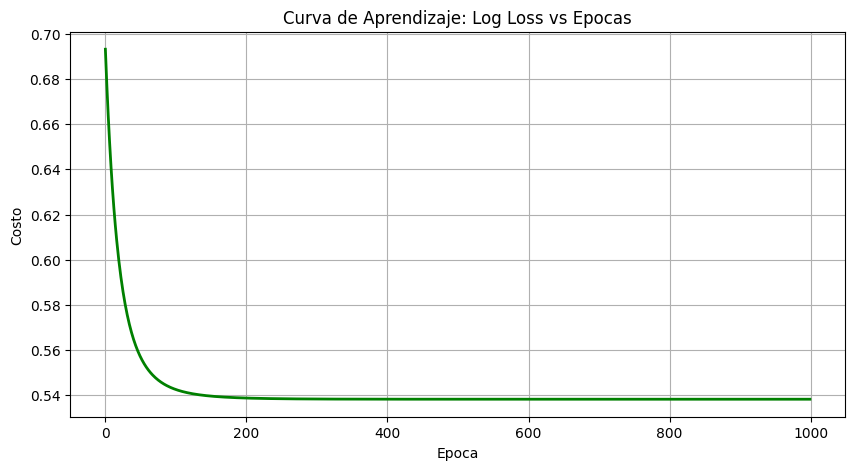

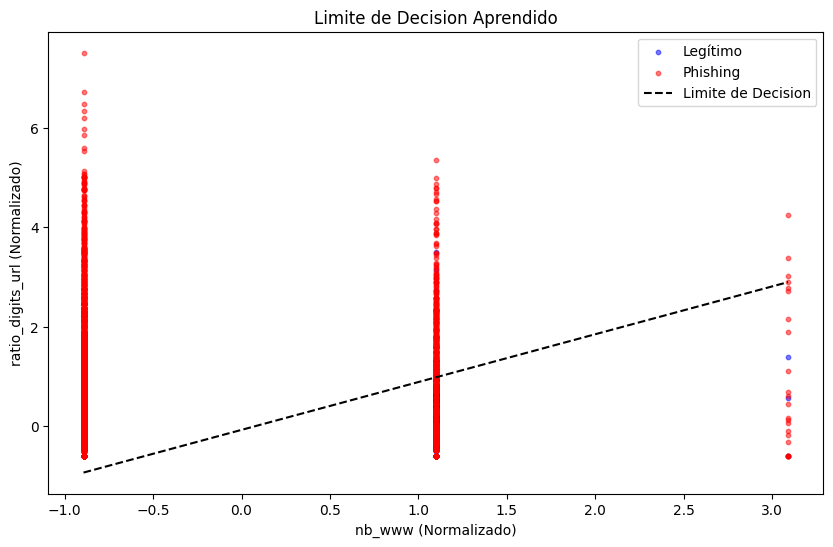

In [17]:
# Grafica de Costo 
plt.figure(figsize=(10, 5))
plt.plot(history, color='green', linewidth=2)
plt.title('Curva de Aprendizaje: Log Loss vs Epocas')
plt.xlabel('Epoca')
plt.ylabel('Costo')
plt.grid(True)
plt.show()

# Threshold de Decision 
plt.figure(figsize=(10, 6))

plt.scatter(X_norm[y.flatten() == 0, 0], X_norm[y.flatten() == 0, 1], 
            color='blue', label='Legítimo', alpha=0.5, s=10)
plt.scatter(X_norm[y.flatten() == 1, 0], X_norm[y.flatten() == 1, 1], 
            color='red', label='Phishing', alpha=0.5, s=10)

# w1*x1 + w2*x2 + b = 0  => x2 = -(w1*x1 + b) / w2
x1_vals = np.linspace(X_norm[:, 0].min(), X_norm[:, 0].max(), 100)
x2_vals = -(w_final[0] * x1_vals + b_final) / w_final[1]

plt.plot(x1_vals, x2_vals, color='black', linestyle='--', label='Limite de Decision')

plt.title('Limite de Decision Aprendido')
plt.xlabel(f'{features[0]} (Normalizado)')
plt.ylabel(f'{features[1]} (Normalizado)')
plt.legend()
plt.show()

In [18]:
def euclidean_distance(point, data): # sqrt(sum((p1 - p2)^2))
    return np.sqrt(np.sum((point - data)**2, axis=1))

def predict_knn(X_train, y_train, X_test, k):
    y_pred = []
    
    for test_point in X_test:
        distances = euclidean_distance(test_point, X_train)

        k_indices = np.argsort(distances)[:k]
        
        k_nearest_labels = y_train[k_indices].flatten()
        
        counts = np.bincount(k_nearest_labels.astype(int))
        most_common = np.argmax(counts)
        
        y_pred.append(most_common)
        
    return np.array(y_pred)

In [19]:
K = 3

y_pred_knn = predict_knn(X_norm, y, X_norm, k=K)

print(f"Predicciones para los primeros 5 elementos: {y_pred_knn[:5]}")

Predicciones para los primeros 5 elementos: [0 1 1 1 0]


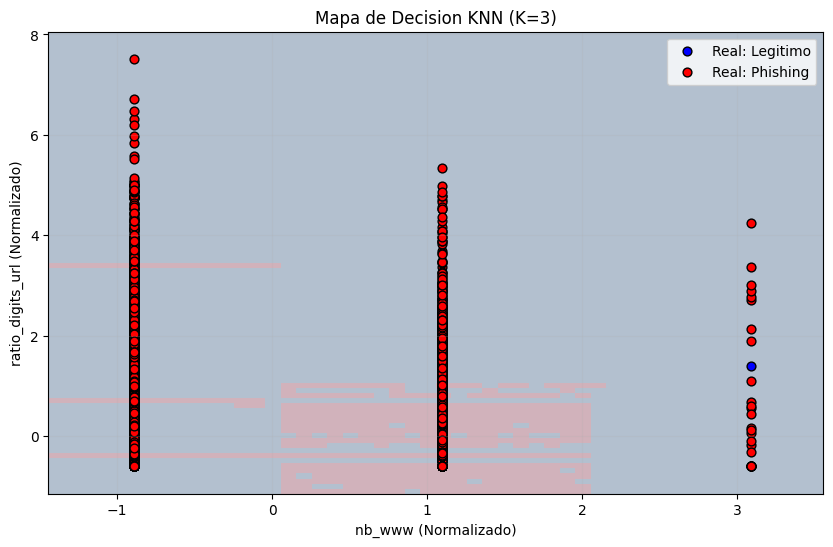

In [20]:
x_min, x_max = X_norm[:, 0].min() - 0.5, X_norm[:, 0].max() + 0.5
y_min, y_max = X_norm[:, 1].min() - 0.5, X_norm[:, 1].max() + 0.5


h = 0.1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict_knn(X_norm, y, grid_points, k=K)

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))# Graficar

plt.pcolormesh(xx, yy, Z, cmap='RdBu', alpha=0.3, shading='auto')

# Superponer los puntos reales
plt.scatter(X_norm[y.flatten() == 0, 0], X_norm[y.flatten() == 0, 1], 
            color='blue', label='Real: Legitimo', edgecolors='k', s=40)
plt.scatter(X_norm[y.flatten() == 1, 0], X_norm[y.flatten() == 1, 1], 
            color='red', label='Real: Phishing', edgecolors='k', s=40)

plt.title(f'Mapa de Decision KNN (K={K})')
plt.xlabel(f'{features[0]} (Normalizado)')
plt.ylabel(f'{features[1]} (Normalizado)')
plt.legend()
plt.grid(alpha=0.2)
plt.show()